In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [56]:
u_files = [f'/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3732/6373Pset5/OceanFlow/{i}u.csv' for i in range(1, 101)]
v_files = [f'/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3732/6373Pset5/OceanFlow/{i}v.csv' for i in range(1, 101)]

u_mats = [np.loadtxt(fname, delimiter=',') for fname in u_files] # u_mats[i] is the u components at time_block i+1
v_mats = [np.loadtxt(fname, delimiter=',') for fname in v_files]

# u_mats = [25/0.9 * u for u in u_mats]
# v_mats = [25/0.9 * v for v in v_mats]

In [57]:
def average_matrices(file_list):
    """
    Load each CSV in file_list as a 2D array and return their element‐wise mean.
    """
    # read all files into a list of 2D arrays
    mats = [np.loadtxt(fname, delimiter=',') for fname in file_list]
    # stack into shape (n_files, rows, cols) and average over axis 0
    return np.stack(mats, axis=0).mean(axis=0) * (25/0.9)

avg_u = average_matrices(u_files)
avg_v = average_matrices(v_files)

#### part 5.2 a

In [9]:
# loc is (x,y) coordinate
# mat_loc is (row, col) what cell we are in on the matrices

# time is true hours
# timeblock is which numbered file to look at

def get_mat_loc(loc):
    x, y = loc
    return (int(y//3), int(x//3))

def get_timeblock(time):
    """
    What index of u_mats and v_mats to access
    """
    return int(time//3)

def get_flow(mat_loc, timeblock):
    u = u_mats[timeblock]
    v = v_mats[timeblock]

    row, col = mat_loc

    return (u[row][col], v[row][col])



In [23]:
def clipped_loc(loc, u, v):
    """
    Used when going velo for 3 hours leaves the cell grid
    """

    x, y = loc
    if u > 0:
        x_bound = 3*(x//3 + 1)
    else:
        x_bound = 3*(x//3)

        if x_bound == x:
            x_bound -= 3

    if v > 0:
        y_bound = 3*(y//3 + 1)
    else:
        y_bound = 3*(y//3)

        if y_bound == y:
            y_bound -= 3

    time_x = (x_bound-x)/u if u!=0 else float('inf')
    time_y = (y_bound-y)/v if v!=0 else float('inf')

    time = min(3, time_x, time_y)

    return (float(x+time*u), float(y+time*v)), time



def get_path(T, start):
    """
    start in form of loc
    """
    
    time = 0
    interesting_locs = []
    current_loc = start

    while time < T:
        interesting_locs.append(current_loc)

        timeblock = get_timeblock(time)

        mat_loc = get_mat_loc(current_loc)

        u, v = get_flow(mat_loc, timeblock)

        new_loc = (float(current_loc[0] + 3*u), float(current_loc[1] + 3*v))

        if get_mat_loc(new_loc) == mat_loc:
            current_loc = new_loc
            time += 3

        else:
            current_loc, dtime = clipped_loc(current_loc, u, v)
            time += dtime

    return interesting_locs

/var/folders/k7/r6jxg47s2152drbt5551gslm0000gn/T/ipykernel_9312/1643144291.py:102: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


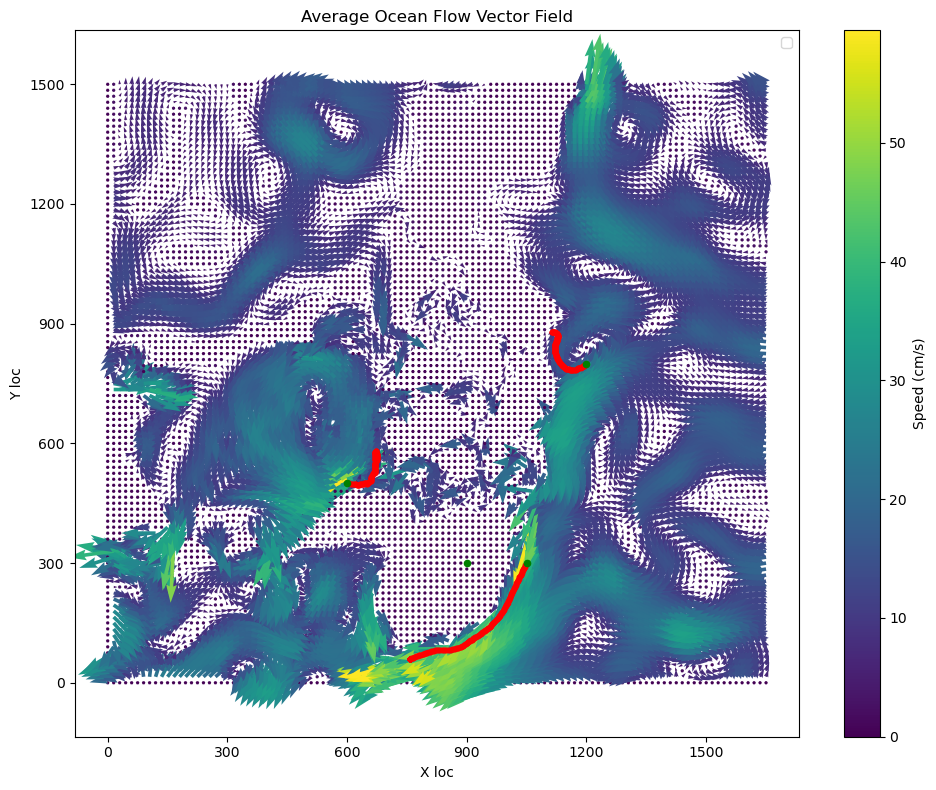

In [35]:
n_rows, n_cols = avg_u.shape

# full-coordinate grid
x = np.arange(n_cols)
y = np.arange(n_rows)
X, Y = np.meshgrid(x, y)

# choose a stride (e.g. every 5th arrow)
stride = 5

# subsample everything
Xs = X[::stride, ::stride]
Ys = Y[::stride, ::stride]
Us = avg_u[::stride, ::stride]
Vs = avg_v[::stride, ::stride]
Speeds = np.sqrt(Us**2 + Vs**2)

# create figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# plot the quiver
q = ax.quiver(
    Xs, Ys,
    Us, Vs,
    Speeds,
    angles='xy',
    scale_units='xy',
    scale=1,
    cmap='viridis',
    width=0.005
)

# add colorbar
cbar = fig.colorbar(q, ax=ax, label='Speed (cm/s)')

# formatter to multiply tick labels by 3
three_times = FuncFormatter(lambda val, pos: f"{val*3:.0f}")

# apply to both axes
ax.xaxis.set_major_formatter(three_times)
ax.yaxis.set_major_formatter(three_times)

# labels and title
ax.set_xlabel('X loc')
ax.set_ylabel('Y loc')
ax.set_title('Average Ocean Flow Vector Field')

ax.axis('equal')

points = [(x/3, y/3) for (x, y) in get_path(300, (1050, 300))]  # list of (x, y) in grid coords
xs, ys = zip(*points)
ax.scatter(xs, ys,
           c='red',        # color of the markers
           s=10,           # size
           marker='o',     # shape
           linewidth=1,)
ax.scatter(350, 300/3,
           c='green',        # color of the markers
           s=20,           # size
           marker='o',     # shape
           linewidth=1,)

points = [(x/3, y/3) for (x, y) in get_path(300, (1200, 800))]  # list of (x, y) in grid coords
xs, ys = zip(*points)
ax.scatter(xs, ys,
           c='red',        # color of the markers
           s=10,           # size
           marker='o',     # shape
           linewidth=1,)
ax.scatter(1200/3, 800/3,
           c='green',        # color of the markers
           s=20,           # size
           marker='o',     # shape
           linewidth=1,)

points = [(x/3, y/3) for (x, y) in get_path(300, (600, 500))]  # list of (x, y) in grid coords
xs, ys = zip(*points)
ax.scatter(xs, ys,
           c='red',        # color of the markers
           s=10,           # size
           marker='o',     # shape
           linewidth=1,)
ax.scatter(600/3, 500/3,
           c='green',        # color of the markers
           s=20,           # size
           marker='o',     # shape
           linewidth=1,)

points = [(x/3, y/3) for (x, y) in get_path(300, (900, 300))]  # list of (x, y) in grid coords
xs, ys = zip(*points)
ax.scatter(xs, ys,
           c='red',        # color of the markers
           s=10,           # size
           marker='o',     # shape
           linewidth=1,)
ax.scatter(900/3, 300/3,
           c='green',        # color of the markers
           s=20,           # size
           marker='o',     # shape
           linewidth=1,)

ax.legend(loc='upper right')

plt.tight_layout()

# save and show
fig.savefig("parta,path.png")
plt.show()

#### part b

In [75]:
# --- parameters ---
mean_loc    = (300, 1050)    # in grid‐units

sigmas = [2, 4, 7]
ends = [[], [], []]

for count, sigma in enumerate(sigmas):
    for i in range(20):
        start = np.random.multivariate_normal(mean_loc, cov = (sigma**2) * np.eye(2))

        ends[count].append(get_path(48, start)[-1])

100 100


/var/folders/k7/r6jxg47s2152drbt5551gslm0000gn/T/ipykernel_9312/2969738142.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


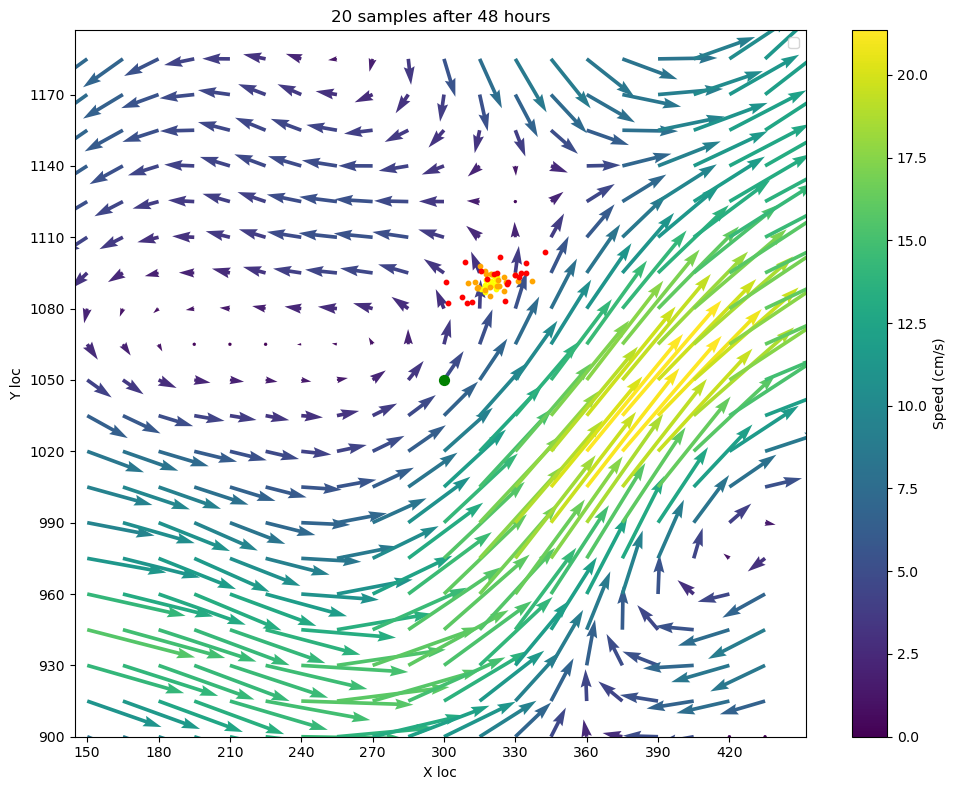

In [ ]:
clip_avg_u = avg_u[300:400, 50:150]
clip_avg_v = avg_v[300:400, 50:150]


n_rows, n_cols = clip_avg_u.shape

print(n_rows, n_cols)

# full-coordinate grid
x = np.arange(n_cols)
y = np.arange(n_rows)
X, Y = np.meshgrid(x, y)

# choose a stride (e.g. every 5th arrow)
stride = 5

# subsample everything
Xs = X[::stride, ::stride]
Ys = Y[::stride, ::stride]
Us = clip_avg_u[::stride, ::stride]
Vs = clip_avg_v[::stride, ::stride]
Speeds = np.sqrt(Us**2 + Vs**2)

# create figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# plot the quiver
q = ax.quiver(
    Xs, Ys,
    Us, Vs,
    Speeds,
    angles='xy',
    scale_units='xy',
    scale=1,
    cmap='viridis',
    width=0.005
)

# add colorbar
cbar = fig.colorbar(q, ax=ax, label='Speed (cm/s)')

# formatter to multiply tick labels by 3
three_times = FuncFormatter(lambda val, pos: f"{val*3:.0f}")

# apply to both axes
ax.xaxis.set_major_formatter(three_times)
ax.yaxis.set_major_formatter(three_times)

# labels and title
ax.set_xlabel('X loc')
ax.set_ylabel('Y loc')
ax.set_title('20 samples after 48 hours')

ax.axis('equal')

points = [(x/3-50, y/3-300) for (x, y) in ends[0]]  # list of (x, y) in grid coords
xs, ys = zip(*points)
ax.scatter(xs, ys,
           c='yellow',        # color of the markers
           s=10,           # size
           marker='o',     # shape
           linewidth=1,)

points = [(x/3-50, y/3-300) for (x, y) in ends[1]]  # list of (x, y) in grid coords
xs, ys = zip(*points)
ax.scatter(xs, ys,
           c='orange',        # color of the markers
           s=10,           # size
           marker='o',     # shape
           linewidth=1,)

points = [(x/3-50, y/3-300) for (x, y) in ends[2]]  # list of (x, y) in grid coords
xs, ys = zip(*points)
ax.scatter(xs, ys,
           c='red',        # color of the markers
           s=10,           # size
           marker='o',     # shape
           linewidth=1,)

ax.scatter(50, 50,
           c='green',        # color of the markers
           s=50,           # size
           marker='o',     # shape
           linewidth=1,)


ax.legend(loc='upper right')

plt.tight_layout()

ax.set_xlim(0, n_cols-1)
ax.set_ylim(0, n_rows-1)
ax.margins(0)

offset = 50                      # the x‐index in the full grid that your slice starts at
step   = 10                       # how often you want a tick
ticks  = np.arange(0, n_cols, step)
labels = ticks + offset

labels = (ticks + offset) * 3    # in km
ax.set_xticks(ticks)
ax.set_xticklabels([f"{L:.0f}" for L in labels])


offset = 300                      # the x‐index in the full grid that your slice starts at
step   = 10                       # how often you want a tick
ticks  = np.arange(0, n_cols, step)
labels = ticks + offset

labels = (ticks + offset) * 3    # in km
ax.set_yticks(ticks)
ax.set_yticklabels([f"{L:.0f}" for L in labels])


# save and show
fig.savefig("part_b48.png")
plt.show()


In [77]:
sigmas = [2, 4, 7]
ends = [[], [], []]

for count, sigma in enumerate(sigmas):
    for i in range(20):
        start = np.random.multivariate_normal(mean_loc, cov = (sigma**2) * np.eye(2))

        ends[count].append(get_path(72, start)[-1])

/var/folders/k7/r6jxg47s2152drbt5551gslm0000gn/T/ipykernel_9312/3537299407.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


100 100


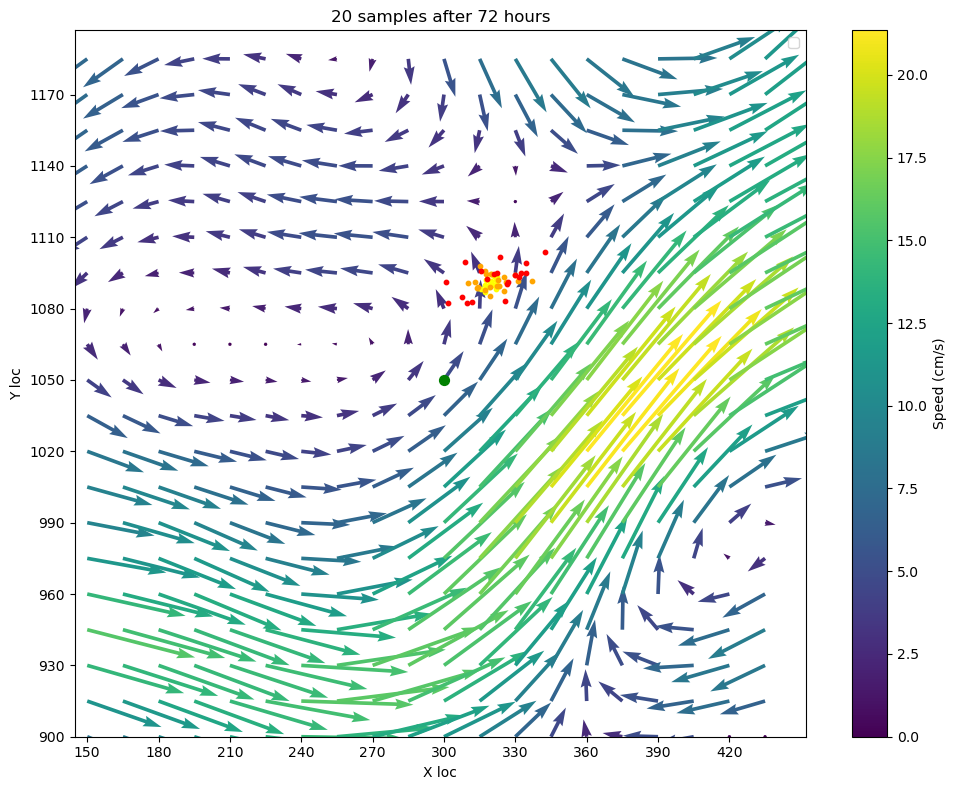

In [83]:
clip_avg_u = avg_u[300:400, 50:150]
clip_avg_v = avg_v[300:400, 50:150]


n_rows, n_cols = clip_avg_u.shape

print(n_rows, n_cols)

# full-coordinate grid
x = np.arange(n_cols)
y = np.arange(n_rows)
X, Y = np.meshgrid(x, y)

# choose a stride (e.g. every 5th arrow)
stride = 5

# subsample everything
Xs = X[::stride, ::stride]
Ys = Y[::stride, ::stride]
Us = clip_avg_u[::stride, ::stride]
Vs = clip_avg_v[::stride, ::stride]
Speeds = np.sqrt(Us**2 + Vs**2)

# create figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# plot the quiver
q = ax.quiver(
    Xs, Ys,
    Us, Vs,
    Speeds,
    angles='xy',
    scale_units='xy',
    scale=1,
    cmap='viridis',
    width=0.005
)

# add colorbar
cbar = fig.colorbar(q, ax=ax, label='Speed (cm/s)')

# formatter to multiply tick labels by 3
three_times = FuncFormatter(lambda val, pos: f"{val*3:.0f}")

# apply to both axes
ax.xaxis.set_major_formatter(three_times)
ax.yaxis.set_major_formatter(three_times)

# labels and title
ax.set_xlabel('X loc')
ax.set_ylabel('Y loc')
ax.set_title('20 samples after 72 hours')

ax.axis('equal')

points = [(x/3-50, y/3-300) for (x, y) in ends[0]]  # list of (x, y) in grid coords
xs, ys = zip(*points)
ax.scatter(xs, ys,
           c='yellow',        # color of the markers
           s=10,           # size
           marker='o',     # shape
           linewidth=1,)

points = [(x/3-50, y/3-300) for (x, y) in ends[1]]  # list of (x, y) in grid coords
xs, ys = zip(*points)
ax.scatter(xs, ys,
           c='orange',        # color of the markers
           s=10,           # size
           marker='o',     # shape
           linewidth=1,)

points = [(x/3-50, y/3-300) for (x, y) in ends[2]]  # list of (x, y) in grid coords
xs, ys = zip(*points)
ax.scatter(xs, ys,
           c='red',        # color of the markers
           s=10,           # size
           marker='o',     # shape
           linewidth=1,)

ax.scatter(50, 50,
           c='green',        # color of the markers
           s=50,           # size
           marker='o',     # shape
           linewidth=1,)


ax.legend(loc='upper right')

plt.tight_layout()

ax.set_xlim(0, n_cols-1)
ax.set_ylim(0, n_rows-1)
ax.margins(0)

offset = 50                      # the x‐index in the full grid that your slice starts at
step   = 10                       # how often you want a tick
ticks  = np.arange(0, n_cols, step)
labels = ticks + offset

labels = (ticks + offset) * 3    # in km
ax.set_xticks(ticks)
ax.set_xticklabels([f"{L:.0f}" for L in labels])


offset = 300                      # the x‐index in the full grid that your slice starts at
step   = 10                       # how often you want a tick
ticks  = np.arange(0, n_cols, step)
labels = ticks + offset

labels = (ticks + offset) * 3    # in km
ax.set_yticks(ticks)
ax.set_yticklabels([f"{L:.0f}" for L in labels])


# save and show
fig.savefig("part_b72.png")
plt.show()


In [80]:
sigmas = [2, 4, 7]
ends = [[], [], []]

for count, sigma in enumerate(sigmas):
    for i in range(20):
        start = np.random.multivariate_normal(mean_loc, cov = (sigma**2) * np.eye(2))

        ends[count].append(get_path(120, start)[-1])

/var/folders/k7/r6jxg47s2152drbt5551gslm0000gn/T/ipykernel_9312/2452322386.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


100 100


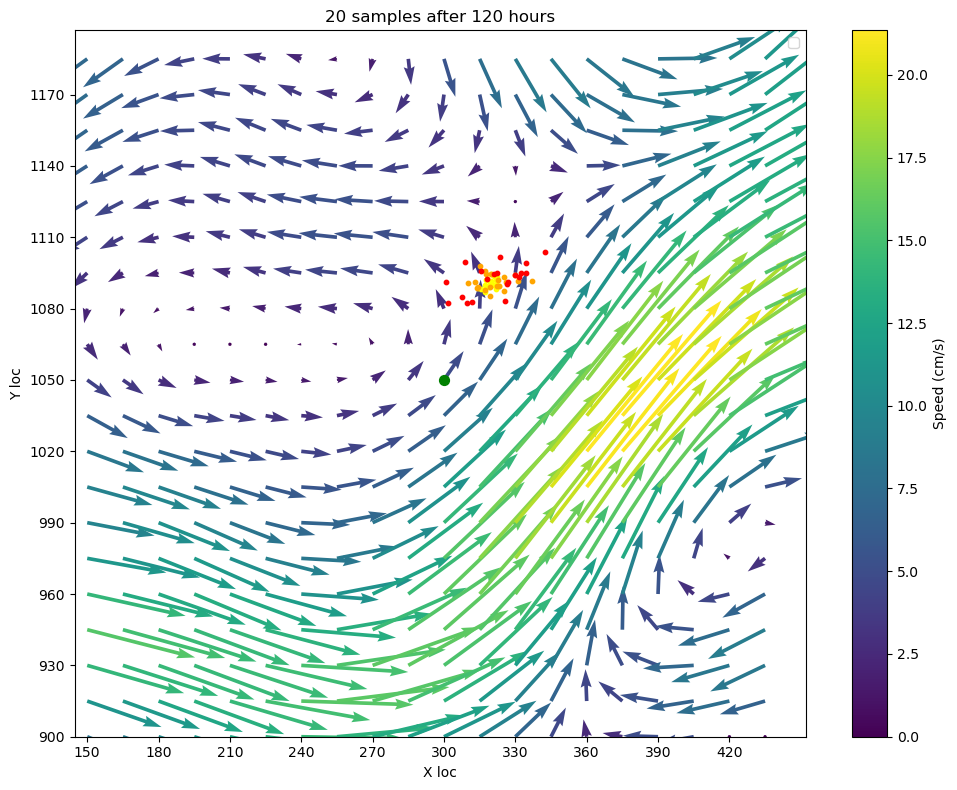

In [84]:
clip_avg_u = avg_u[300:400, 50:150]
clip_avg_v = avg_v[300:400, 50:150]


n_rows, n_cols = clip_avg_u.shape

print(n_rows, n_cols)

# full-coordinate grid
x = np.arange(n_cols)
y = np.arange(n_rows)
X, Y = np.meshgrid(x, y)

# choose a stride (e.g. every 5th arrow)
stride = 5

# subsample everything
Xs = X[::stride, ::stride]
Ys = Y[::stride, ::stride]
Us = clip_avg_u[::stride, ::stride]
Vs = clip_avg_v[::stride, ::stride]
Speeds = np.sqrt(Us**2 + Vs**2)

# create figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# plot the quiver
q = ax.quiver(
    Xs, Ys,
    Us, Vs,
    Speeds,
    angles='xy',
    scale_units='xy',
    scale=1,
    cmap='viridis',
    width=0.005
)

# add colorbar
cbar = fig.colorbar(q, ax=ax, label='Speed (cm/s)')

# formatter to multiply tick labels by 3
three_times = FuncFormatter(lambda val, pos: f"{val*3:.0f}")

# apply to both axes
ax.xaxis.set_major_formatter(three_times)
ax.yaxis.set_major_formatter(three_times)

# labels and title
ax.set_xlabel('X loc')
ax.set_ylabel('Y loc')
ax.set_title('20 samples after 120 hours')

ax.axis('equal')

points = [(x/3-50, y/3-300) for (x, y) in ends[0]]  # list of (x, y) in grid coords
xs, ys = zip(*points)
ax.scatter(xs, ys,
           c='yellow',        # color of the markers
           s=10,           # size
           marker='o',     # shape
           linewidth=1,)

points = [(x/3-50, y/3-300) for (x, y) in ends[1]]  # list of (x, y) in grid coords
xs, ys = zip(*points)
ax.scatter(xs, ys,
           c='orange',        # color of the markers
           s=10,           # size
           marker='o',     # shape
           linewidth=1,)

points = [(x/3-50, y/3-300) for (x, y) in ends[2]]  # list of (x, y) in grid coords
xs, ys = zip(*points)
ax.scatter(xs, ys,
           c='red',        # color of the markers
           s=10,           # size
           marker='o',     # shape
           linewidth=1,)

ax.scatter(50, 50,
           c='green',        # color of the markers
           s=50,           # size
           marker='o',     # shape
           linewidth=1,)


ax.legend(loc='upper right')

plt.tight_layout()

ax.set_xlim(0, n_cols-1)
ax.set_ylim(0, n_rows-1)
ax.margins(0)

offset = 50                      # the x‐index in the full grid that your slice starts at
step   = 10                       # how often you want a tick
ticks  = np.arange(0, n_cols, step)
labels = ticks + offset

labels = (ticks + offset) * 3    # in km
ax.set_xticks(ticks)
ax.set_xticklabels([f"{L:.0f}" for L in labels])


offset = 300                      # the x‐index in the full grid that your slice starts at
step   = 10                       # how often you want a tick
ticks  = np.arange(0, n_cols, step)
labels = ticks + offset

labels = (ticks + offset) * 3    # in km
ax.set_yticks(ticks)
ax.set_yticklabels([f"{L:.0f}" for L in labels])


# save and show
fig.savefig("part_b120.png")
plt.show()
